### Example use of the mechanical analysis tool for AFM curves

Code by Mauricio Cano Galván

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from preproc import mechanical_curve, get_rough_topo, sensitivity_analysis
from os import listdir
from os.path import isfile, join
from models import cone, cone_bottom_herman, parab_bott_herman, hertz_r_free, FaSphereGO5good, FaSphereGomila_limit, FaSphereGomila
from tqdm import tqdm
from IPython.display import clear_output

In [2]:
# Directory for a folder with .txt curve files
folder=r'C:\Users\mcano\Code2\data\raw\bea\double_regime\processed_curves-2024.12.18-14.30.03'
file_list = [f for f in listdir(folder) if isfile(join(folder, f))]


100%|██████████| 1024/1024 [00:28<00:00, 35.45it/s]


31 curves were skipped


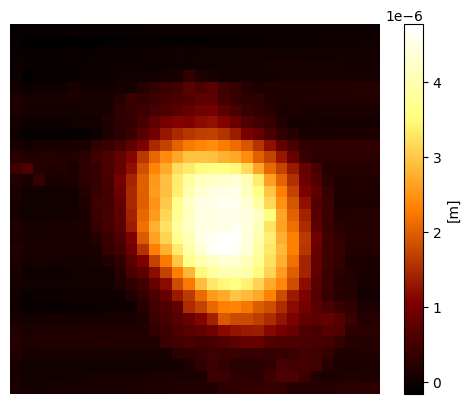

In [3]:
# Make a rough topography calculation
# User-define setpoint in Volts
rough_topo=get_rough_topo(folder, setpoint=-0.5)


plt.figure()
plt.imshow(rough_topo, cmap='afmhot')
plt.axis('off')
plt.colorbar(label='[m]')
plt.show()

Sensitivity:31059747.828976884 V/m, σ: 2122169.5740751196 V/m


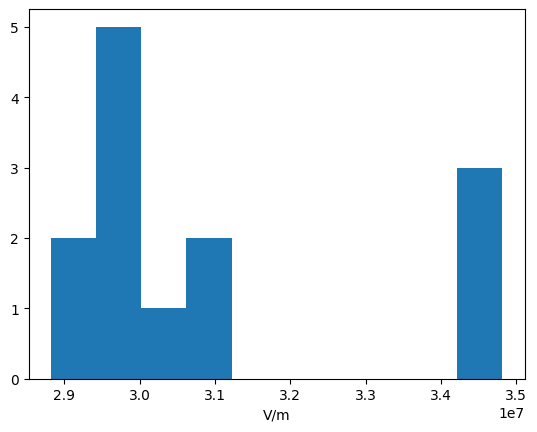

In [4]:
# Perform sensitivity analysis.
# get-cutout.py must be ran first to select substrate data

slopes=sensitivity_analysis(folder)
𝗰𝗹𝗲𝗮𝗿_𝗼𝘂𝘁𝗽𝘂𝘁() 

print(rf'Sensitivity:{np.mean(slopes)} V/m, σ: {np.std(slopes)} V/m')
sensitivity=np.mean(slopes)

plt.figure()
plt.hist(slopes)
plt.xlabel('V/m')
plt.show()


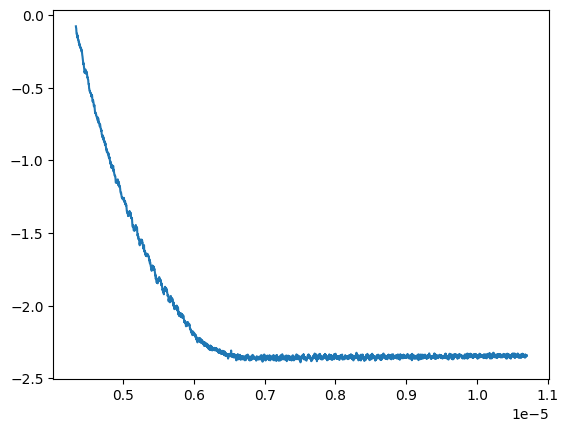

In [5]:
## Processing workflow for a single curve

# Enter index of teh curve to analyze. Alternatevily, replace the filename variable with the directory of a .txt curve
idx=496
filename=rf'{folder}\{file_list[idx]}'

# Create curve object
curve=mechanical_curve(filename)

plt.figure()
plt.plot(curve.zpiezo, curve.vdef)
plt.show()


In [6]:
curve.get_height(setpoint=-0.5)

# # Correct baseline offset and slope
curve.correct_baseline()


# Apply contact point
curve.zero_x_axis(poc='baseline_stop')


# Callibrate curve
curve.callibrate(sensitivity=sensitivity, k=84.24e-3)

# Calculate tip position
curve.correct_bending()


c:\Users\mcano\Code2\projects\mechanical_tool\.venv\Lib\site-packages\scipy\stats\_stats_py.py:10729: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
c:\Users\mcano\Code2\projects\mechanical_tool\.venv\Lib\site-packages\scipy\stats\_stats_py.py:10743: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
c:\Users\mcano\Code2\projects\mechanical_tool\.venv\Lib\site-packages\scipy\stats\_stats_py.py:10749: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


E = [350.97964386]


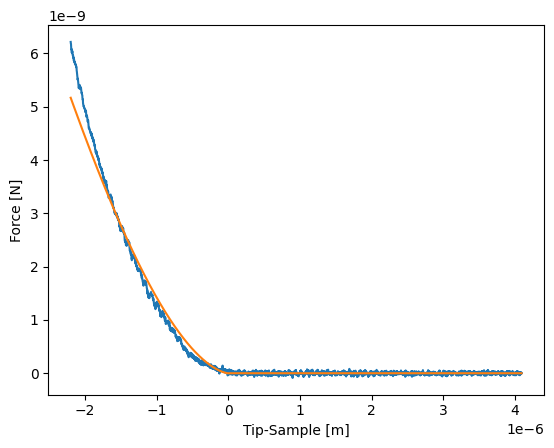

In [7]:
# Perform simple fitting
curve.fit(model=FaSphereGO5good, initial_guess=[1e3],params = {
    'Zc': 0,
    'R': 2.5e-6,
    'h': curve.topo_height,
    'dF': 0
} )

  0%|          | 0/1041 [00:00<?, ?it/s]c:\Users\mcano\Code2\projects\mechanical_tool\preproc.py:465: OptimizeWarning: Covariance of the parameters could not be estimated
  params = curve_fit(model_partial, z[0:i], f[0:i], p0=initial_guess, full_output=True)
100%|██████████| 1041/1041 [00:41<00:00, 24.84it/s]


fit 1: E = 3706.5449442913086, Zc = 5.11498949021897e-08


100%|██████████| 1041/1041 [00:26<00:00, 39.47it/s] 


fit 2: E = 5033.407000161094, Zc = -2.1217151280394648e-07


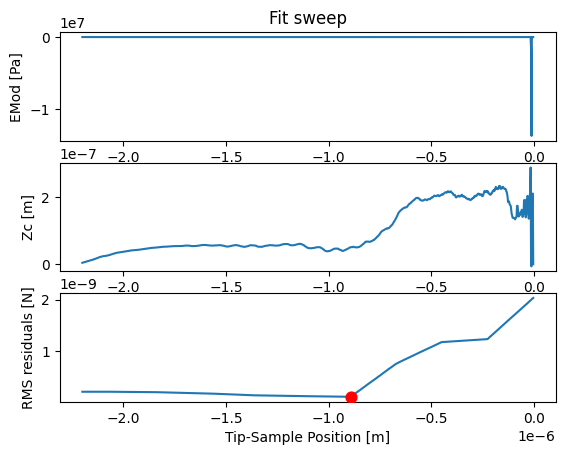

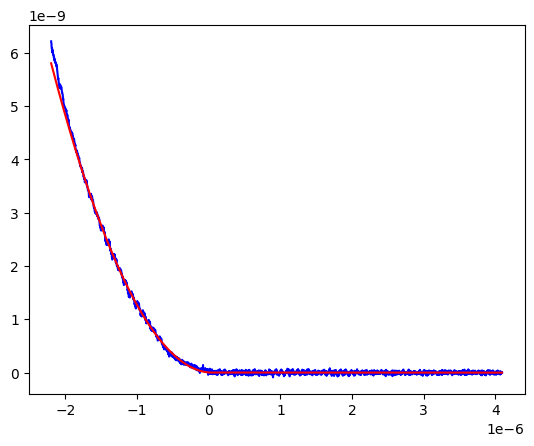

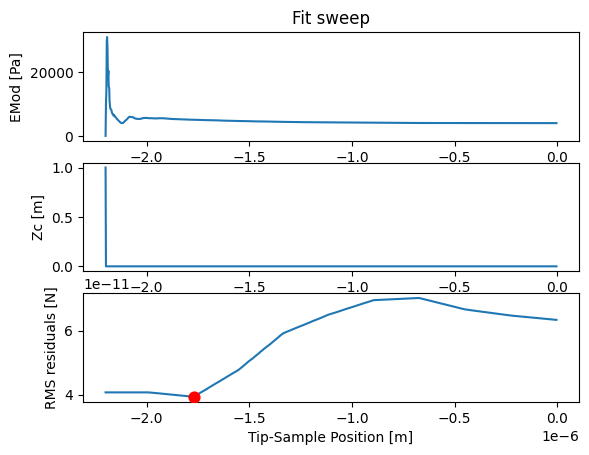

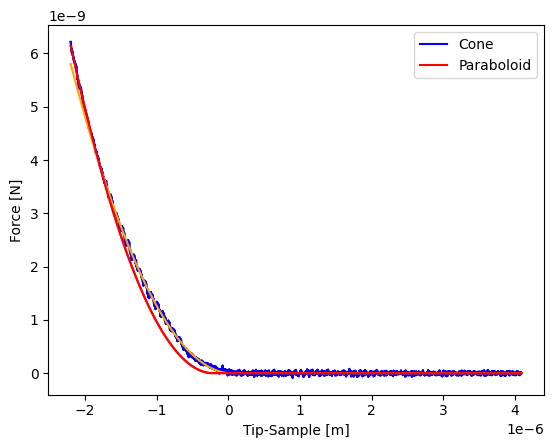

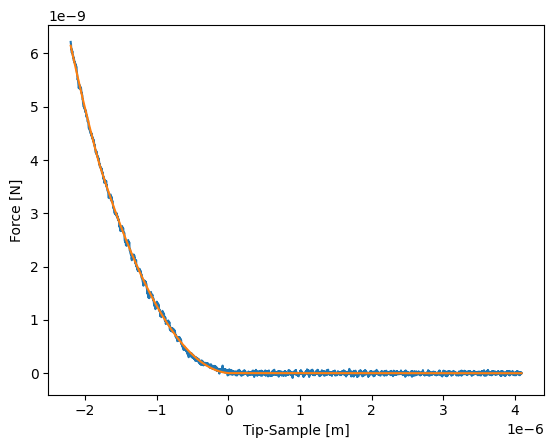

In [8]:
# Perform double-regime fitting

curve.fit_sweep_forward(model=cone, params = {
    'Q': 20,
    'nu': 0.5,
    'dF': 0
} )

curve.fit_sweep_backward(model=cone, params = {
    'Q': 20,
    'nu': 0.5,
    'dF': 0
} ) 
curve.merge_fits()
